# Exercise 06
# TensorFlow and Keras


---

In [80]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Multilayer neural network in TensorFlow

You need to create a neural network model in TF that is able to discriminate the two classes in the following dataset:

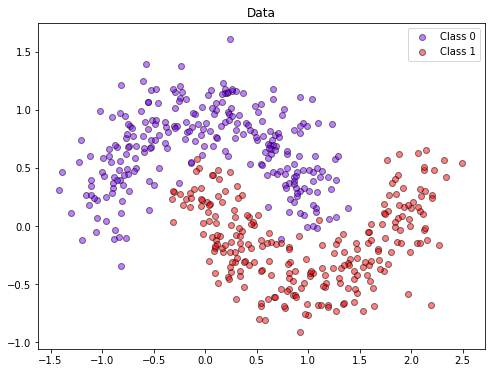

In [4]:
X, Y = make_moons(n_samples=1000, noise= 0.2, random_state=3)
x_train = X[:500]
x_test  = X[500:]
y_train = Y[:500]
y_test  = Y[500:]

pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

For this you will need to create a neural network with one hidden layer. You cannot use prebuilt models 
such as those in `tf.estimator`. **Hint**: extend the logistic regression example from the TensorFlow handout. 

Your answer must contain the following:
* A visualization of the CG of the model.
* A visualization of the decision region along with the test data.
* A snapshot from TensorBoard that shows the evolution of the training and test loss.

### 2. Improving the Keras text classifier

Your goal is to improve the performance of the text classifier in the Keras handout. This is are the things that you need to try:

* Different activation functions for the hidden layer (https://keras.io/activations/)
* Different optimizers (https://keras.io/optimizers/)
* Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)
* Different initializers for the dense layers (https://keras.io/initializers/)

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?


In [87]:
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer

max_words = 1000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

Loading data...
8982 train sequences
2246 test sequences
46 classes


Es instancia está representada por una secuencia de números que corresponden a los índices de las palabras correspondientes.

In [33]:
print(x_train[101])

[1, 2, 149, 8, 25, 2, 400, 304, 200, 6, 337, 4, 342, 2, 2, 7, 2, 2, 9, 4, 342, 643, 2, 7, 2, 4, 88, 2, 31, 4, 384, 292, 211, 5, 2, 978, 220, 33, 851, 2, 11, 15, 9, 447, 7, 42, 92, 131, 276, 5, 156, 11, 15, 50, 33, 30, 2, 7, 2, 383, 29, 336, 25, 383, 29, 2, 94, 156, 4, 49, 8, 7, 788, 4, 88, 33, 2, 747, 11, 15, 197, 92, 222, 825, 5, 934, 11, 15, 2, 8, 17, 12]


In [88]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
num_words = max(word_index.values()) + 1
words = ['']*num_words
for word in word_index:
    words[word_index[word]] = word
print([words[i-2] for i in x_train[101][1:]])

['', 'dlr', 'and', 'cts', '', '80', 'average', 'companies', 'in', 'income', 'of', 'make', '', '', 'said', '', '', 'a', 'of', 'make', '52', '', 'said', '', 'of', '1987', '', '2', 'of', 'sold', 'general', 'states', 'to', '', 'field', 'securities', 'was', 'agricultural', '', '3', 'it', 'a', '1988', 'said', 'as', 'april', '50', 'term', 'to', 'earlier', '3', 'it', 'but', 'was', 'with', '', 'said', '', 'previously', 'be', 'sell', 'cts', 'previously', 'be', '', 'more', 'earlier', 'of', 'which', 'and', 'said', 'commerce', 'of', '1987', 'was', '', 'august', '3', 'it', 'export', 'april', 'report', 'vice', 'to', 'beef', '3', 'it', '', 'and', '000', 'for']



Los datos se codifican utilizando una bolsa de representación de palabras, es decir, una matriz de tamaño num. De instancias por tamaño de vocabulario

In [89]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [90]:
import keras
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [91]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_9 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_9 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_10 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_10 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [92]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [93]:
batch_size =32 
epochs =5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 4s 488us/step - loss: 2.4542 - acc: 0.3630 - val_loss: 2.3069 - val_acc: 0.4260
Epoch 2/5
8083/8083 [==============================] - 1s 150us/step - loss: 2.1809 - acc: 0.4397 - val_loss: 2.1788 - val_acc: 0.4750
Epoch 3/5
8083/8083 [==============================] - 1s 131us/step - loss: 2.0693 - acc: 0.4876 - val_loss: 2.0863 - val_acc: 0.4905
Epoch 4/5
8083/8083 [==============================] - 1s 135us/step - loss: 1.9903 - acc: 0.5032 - val_loss: 2.0180 - val_acc: 0.5061
Epoch 5/5
8083/8083 [==============================] - 1s 137us/step - loss: 1.9276 - acc: 0.5163 - val_loss: 1.9608 - val_acc: 0.5150


In [94]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 57us/step
Test score: 1.9264667694417899
Test accuracy: 0.5258236865804117


In [117]:
#otro modelo con otra funcion de activacion y otro optimizador

model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_14 (Dense)               (None, 256)                 256256     
______________________________________________________________________
dense_15 (Dense)               (None, 64)                  16448      
______________________________________________________________________
dense_16 (Dense)               (None, 46)                  2990       
______________________________________________________________________
activation_12 (Activation)     (None, 46)                  0          
Total params: 275,694
Trainable params: 275,694
Non-trainable params: 0
______________________________________________________________________


In [118]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [119]:
batch_size =32 
epochs =5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 4s 526us/step - loss: 1.2377 - acc: 0.7231 - val_loss: 1.0156 - val_acc: 0.7820
Epoch 2/5
8083/8083 [==============================] - 2s 211us/step - loss: 0.7129 - acc: 0.8383 - val_loss: 0.9046 - val_acc: 0.7953
Epoch 3/5
8083/8083 [==============================] - 2s 220us/step - loss: 0.5293 - acc: 0.8786 - val_loss: 0.8746 - val_acc: 0.8031
Epoch 4/5
8083/8083 [==============================] - 2s 223us/step - loss: 0.4145 - acc: 0.9056 - val_loss: 0.8763 - val_acc: 0.8020
Epoch 5/5
8083/8083 [==============================] - 2s 214us/step - loss: 0.3346 - acc: 0.9244 - val_loss: 0.9165 - val_acc: 0.7953


In [120]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 62us/step
Test score: 0.9084235549716151
Test accuracy: 0.7951914515223549


In [140]:
#otro modelo con otra funcion de activacion y otro optimizador

model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_24 (Dense)               (None, 256)                 256256     
______________________________________________________________________
dense_25 (Dense)               (None, 64)                  16448      
______________________________________________________________________
dense_26 (Dense)               (None, 46)                  2990       
______________________________________________________________________
activation_15 (Activation)     (None, 46)                  0          
Total params: 275,694
Trainable params: 275,694
Non-trainable params: 0
______________________________________________________________________


In [141]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

In [142]:
batch_size =32 
epochs =5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 378us/step - loss: 1.1861 - acc: 0.7292 - val_loss: 1.0137 - val_acc: 0.7675
Epoch 2/5
8083/8083 [==============================] - 2s 193us/step - loss: 0.6689 - acc: 0.8442 - val_loss: 0.9131 - val_acc: 0.7942
Epoch 3/5
8083/8083 [==============================] - 2s 196us/step - loss: 0.5076 - acc: 0.8823 - val_loss: 0.8992 - val_acc: 0.7898
Epoch 4/5
8083/8083 [==============================] - 2s 191us/step - loss: 0.4122 - acc: 0.9033 - val_loss: 0.9000 - val_acc: 0.7976
Epoch 5/5
8083/8083 [==============================] - 2s 198us/step - loss: 0.3490 - acc: 0.9164 - val_loss: 0.9138 - val_acc: 0.7964


In [143]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 60us/step
Test score: 0.903106994323187
Test accuracy: 0.7880676758682101


In [146]:
#otro modelo con Dropout

model = Sequential()
model.add(Dropout(256, input_shape=(max_words,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dropout_1 (Dropout)            (None, 1000)                0          
______________________________________________________________________
dense_32 (Dense)               (None, 64)                  64064      
______________________________________________________________________
dense_33 (Dense)               (None, 46)                  2990       
______________________________________________________________________
activation_18 (Activation)     (None, 46)                  0          
Total params: 67,054
Trainable params: 67,054
Non-trainable params: 0
______________________________________________________________________


In [147]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [148]:
batch_size =32 
epochs =5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 298us/step - loss: 1.6193 - acc: 0.6358 - val_loss: 1.3062 - val_acc: 0.7241
Epoch 2/5
8083/8083 [==============================] - 1s 99us/step - loss: 1.0752 - acc: 0.7627 - val_loss: 1.1313 - val_acc: 0.7553
Epoch 3/5
8083/8083 [==============================] - 1s 95us/step - loss: 0.8791 - acc: 0.8084 - val_loss: 1.0358 - val_acc: 0.7642
Epoch 4/5
8083/8083 [==============================] - 1s 91us/step - loss: 0.7507 - acc: 0.8335 - val_loss: 0.9815 - val_acc: 0.7798
Epoch 5/5
8083/8083 [==============================] - 1s 89us/step - loss: 0.6564 - acc: 0.8536 - val_loss: 0.9458 - val_acc: 0.7909


In [149]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 47us/step
Test score: 0.9151565680414677
Test accuracy: 0.784060552092609


Conclusiones Generales: se evidencia en general un mejor accurancy del 0.7951 usando los siguientes parametros: optimizer='rmsprop' activation='relu' en la primera capa y en la ultima activation='softmax'. 